In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datasets/evdataset.csv", usecols=['id','Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range', 'Drive', 'Battery Capacity', 'Charge Power', 'Charge Speed', 'Fastcharge Speed'])

In [3]:
df.head()

,id,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed
0,1647,7.8,185,390,Rear,77.4,11.0,49,1020
1,1493,6.2,160,330,AWD,69.7,11.0,46,470
2,1229,3.2,260,415,AWD,93.4,11.0,46,1020
3,1252,5.7,190,470,Rear,83.9,11.0,54,730
4,1534,7.9,160,450,Rear,82.0,11.0,55,570


In [4]:
df = df.join(pd.get_dummies(df['Drive']).replace({True : 1, False : 0}))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         194 non-null    int64  
 1   Acceleration 0 - 100 km/h  194 non-null    float64
 2   Top Speed                  194 non-null    int64  
 3   Electric Range             194 non-null    int64  
 4   Drive                      194 non-null    object 
 5   Battery Capacity           194 non-null    float64
 6   Charge Power               194 non-null    float64
 7   Charge Speed               194 non-null    int64  
 8   Fastcharge Speed           194 non-null    int64  
 9   AWD                        194 non-null    int64  
 10  Front                      194 non-null    int64  
 11  Rear                       194 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 18.3+ KB


In [6]:
df_corr = df.drop(columns=['Drive']).corr()['Electric Range'].reset_index().sort_values(by='Electric Range', ascending=False)
df_corr['skew'] = df_corr['index'].apply(lambda x : df[x].skew())
df_corr

,index,Electric Range,skew
3,Electric Range,1.000000,0.120819
4,Battery Capacity,0.863062,0.036247
2,Top Speed,0.706707,0.627246
7,Fastcharge Speed,0.701595,0.860008
8,AWD,0.490464,0.469382
6,Charge Speed,0.415019,1.810179
5,Charge Power,0.398395,2.121173
10,Rear,0.220254,1.245858
0,id,0.128289,-0.704776
9,Front,-0.686377,0.514713


In [7]:
df.describe()

,id,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,AWD,Front,Rear
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,7.870619,177.015464,345.592784,74.059278,10.151546,44.396907,528.711340,0.386598,0.376289,0.237113
std,154.958947,3.168385,38.110213,101.384377,20.122679,2.754238,15.617918,256.219808,0.488230,0.485707,0.426413
min,1116.000000,2.800000,125.000000,135.000000,23.800000,6.600000,24.000000,150.000000,0.000000,0.000000,0.000000
25%,1437.250000,5.400000,150.000000,265.000000,55.750000,7.400000,34.000000,312.500000,0.000000,0.000000,0.000000
50%,1557.500000,7.400000,160.000000,352.500000,75.000000,11.000000,46.000000,470.000000,0.000000,0.000000,0.000000
75%,1648.750000,9.650000,200.000000,410.000000,83.900000,11.000000,51.750000,650.000000,1.000000,1.000000,0.000000
max,1757.000000,19.100000,261.000000,640.000000,120.000000,22.000000,110.000000,1170.000000,1.000000,1.000000,1.000000


/tmp/ipykernel_15408/3426436549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Electric Range'])
/tmp/ipykernel_15408/3426436549.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Battery Capacity'])


<Axes: xlabel='Battery Capacity', ylabel='Density'>

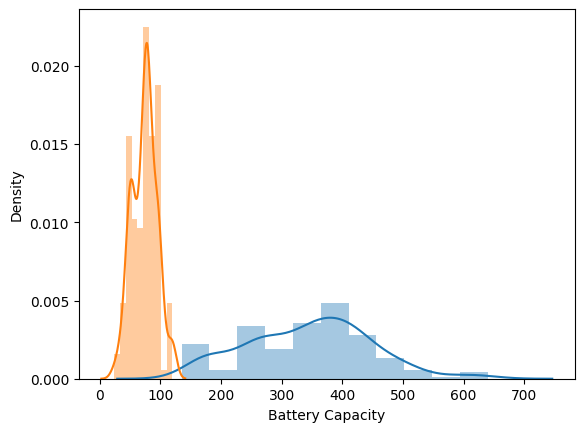

In [8]:
sns.distplot(df['Electric Range'])
sns.distplot(df['Battery Capacity'])

In [9]:
X = df[['Battery Capacity', 'Top Speed']].values
y = df['Electric Range'].values.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [11]:
# after standerdization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_15408/575693855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[:,0])
/tmp/ipykernel_15408/575693855.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[:,1])


<Axes: ylabel='Density'>

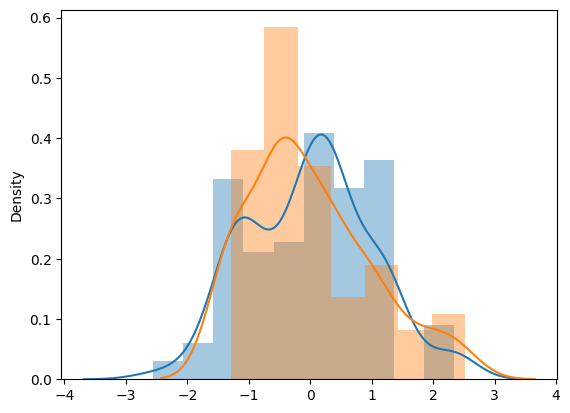

In [13]:
sns.distplot(X_train_scaled[:,0])
sns.distplot(X_train_scaled[:,1])

In [14]:
df

,id,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,AWD,Front,Rear
0,1647,7.8,185,390,Rear,77.4,11.0,49,1020,0,0,1
1,1493,6.2,160,330,AWD,69.7,11.0,46,470,1,0,0
2,1229,3.2,260,415,AWD,93.4,11.0,46,1020,1,0,0
3,1252,5.7,190,470,Rear,83.9,11.0,54,730,0,0,1
4,1534,7.9,160,450,Rear,82.0,11.0,55,570,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,2.8,260,400,AWD,93.4,11.0,45,980,1,0,0
190,1533,7.9,160,450,Rear,82.0,11.0,55,570,0,0,1
191,1547,11.7,135,195,Front,50.0,7.4,27,310,0,1,0
192,1492,6.2,180,400,AWD,82.0,11.0,49,500,1,0,0


In [15]:
df['Top Speed'].describe().reset_index()

,index,Top Speed
0,count,194.000000
1,mean,177.015464
2,std,38.110213
3,min,125.000000
4,25%,150.000000
5,50%,160.000000
6,75%,200.000000
7,max,261.000000


In [19]:
# binning using Kdiscritization
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(dtype=np.float32, n_bins=3, strategy='uniform', encode='onehot-dense')

In [20]:
kbin.fit_transform(df['Top Speed'].values.reshape(-1,1))

/home/prafull/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [21]:
kbin.bin_edges_

array([array([125.        , 170.33333333, 215.66666667, 261.        ])],
      dtype=object)

In [ ]:
# def for_speed(value: float):
#     if value >= 240:
#         return "HIGH"
    
#     if value >= 180:
#         return "MID"
    
#     return "LOW"

In [ ]:
# df['Top Speed'] = df['Top Speed'].apply(for_speed)

<Axes: xlabel='Battery Capacity', ylabel='Electric Range'>

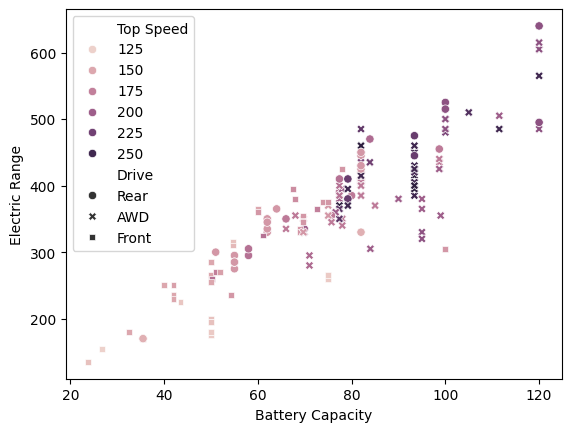

In [22]:
sns.scatterplot(y=df['Electric Range'], x=df['Battery Capacity'], hue=df['Top Speed'], style=df['Drive'])

In [23]:
df.head()

,id,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,AWD,Front,Rear
0,1647,7.8,185,390,Rear,77.4,11.0,49,1020,0,0,1
1,1493,6.2,160,330,AWD,69.7,11.0,46,470,1,0,0
2,1229,3.2,260,415,AWD,93.4,11.0,46,1020,1,0,0
3,1252,5.7,190,470,Rear,83.9,11.0,54,730,0,0,1
4,1534,7.9,160,450,Rear,82.0,11.0,55,570,0,0,1


In [26]:
# (df['Top Speed'].value_counts() / df.shape[0]).reset_index()

<Axes: >

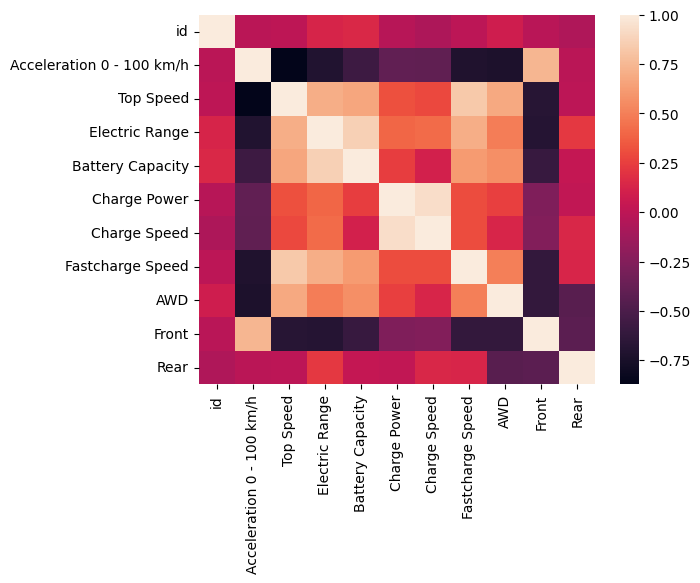

In [32]:
sns.heatmap(df[df.describe().columns].corr())

<Axes: ylabel='count'>

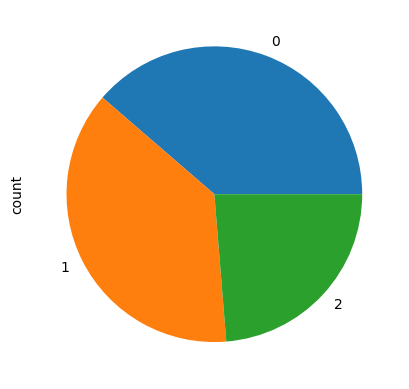

In [68]:
# sns.countplot(x=df['Drive'])
(df['Drive'].value_counts() / df.shape[0]).reset_index(drop=True).plot(kind='pie')

In [44]:
X = df[df.describe().columns].drop(columns=['id', 'Electric Range']).values
y = df['Electric Range'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [43]:
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [56]:
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

0.9737704537053921

In [50]:
r2_score(y_test, y_pred)

0.9753031268633378

In [69]:
df.head()

,id,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,AWD,Front,Rear
0,1647,7.8,185,390,Rear,77.4,11.0,49,1020,0,0,1
1,1493,6.2,160,330,AWD,69.7,11.0,46,470,1,0,0
2,1229,3.2,260,415,AWD,93.4,11.0,46,1020,1,0,0
3,1252,5.7,190,470,Rear,83.9,11.0,54,730,0,0,1
4,1534,7.9,160,450,Rear,82.0,11.0,55,570,0,0,1


In [223]:
X = df.drop(columns=['id', 'Electric Range', 'AWD', 'Front', 'Rear']).values
y = df['Electric Range'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

# imputer
# binning on Top Speed

In [225]:
# preprocessing
# nume

num_imputer = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("standerdization", StandardScaler(with_mean=True))
])
cate_imputer = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=np.int32))
])


In [226]:
df.drop(columns=['id', 'Electric Range', 'AWD', 'Front', 'Rear'])

,Acceleration 0 - 100 km/h,Top Speed,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed
0,7.8,185,Rear,77.4,11.0,49,1020
1,6.2,160,AWD,69.7,11.0,46,470
2,3.2,260,AWD,93.4,11.0,46,1020
3,5.7,190,Rear,83.9,11.0,54,730
4,7.9,160,Rear,82.0,11.0,55,570
...,...,...,...,...,...,...,...
189,2.8,260,AWD,93.4,11.0,45,980
190,7.9,160,Rear,82.0,11.0,55,570
191,11.7,135,Front,50.0,7.4,27,310
192,6.2,180,AWD,82.0,11.0,49,500


In [227]:
preprocessing_tr = ColumnTransformer(
    transformers=[
        ("numerical", num_imputer, [0, 1, 3, 4, 5, 6]),
        ("categorical", cate_imputer, [2]),
        ("descretizer", KBinsDiscretizer(encode='onehot-dense', n_bins=3, strategy='uniform', subsample=None), [1]),
    ],
    remainder='passthrough'
)

In [228]:
pipe = Pipeline([
    ("preprocessing", preprocessing_tr),
    ("lr", LinearRegression())
])

In [229]:
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standerdization',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4, 5, 6]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [2]),
                                                 ('descretizer',
                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                   n_bins=3,
                                                                   strategy='uniform',
                                                                   subsample=None),
                                                  [1])])),
                ('lr', LinearRegression())])

In [230]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standerdization',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4, 5, 6]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [2]),
                                                 ('descretizer',
                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                   n_bins=3,
                                                                   strategy='uniform',
                                                                   subsample=None),
                                                  [1])])),
                ('lr', LinearRegression())])

In [231]:
r2_score(y_test, pipe.predict(X_test))

0.9767498372150241

In [232]:
np.mean(cross_val_score(pipe, X, y, scoring='r2', cv=10))

0.9738125738074972